<a href="https://colab.research.google.com/github/komorimasashi/bunka-hakaru/blob/main/Py_concordance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#音の協和と不協和を体験するプログラム

## 音階を作る

In [5]:
import numpy as np
import soundfile as sf
from IPython.display import Audio

In [6]:
# 周波数配列の作成
def generate_frequencies(base_frequency=261.63, num_divisions=12):
    """
    C4(261.63Hz)を基準として、指定された数で1オクターブを分割した周波数の配列を返す
    """
    return [base_frequency * (2 ** (i/num_divisions)) for i in range(num_divisions+1)]  # 最後の音を含めるため num_divisions+1

In [7]:
# 音階の再生
def play_scale(frequencies, duration=0.5, sample_rate=44100):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    silence = np.zeros(int(sample_rate * 0.1))
    sound = np.concatenate([np.sin(2 * np.pi * freq * t) for freq in frequencies] + [silence for _ in frequencies])
    return Audio(sound, rate=sample_rate)

In [10]:
# 周波数配列の取得 (例: 24分割)
num_divisions = 24  # この値を任意の分割数に変更できます
frequencies = generate_frequencies(num_divisions=num_divisions)

# 音階の再生
play_scale(frequencies)

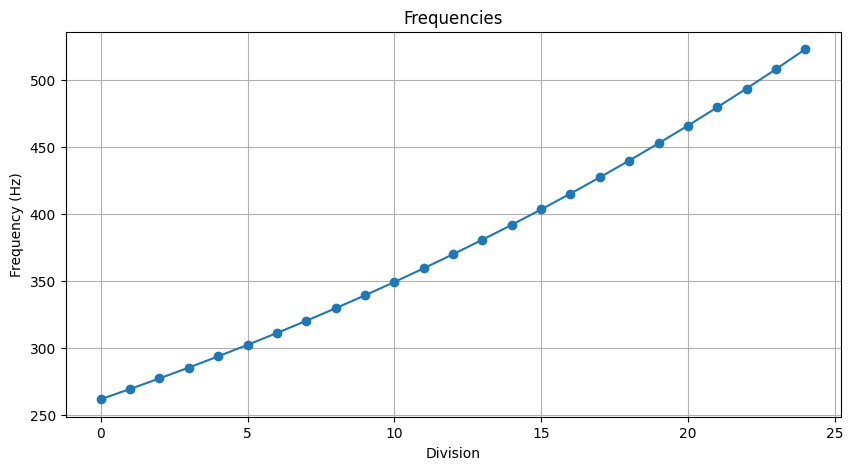

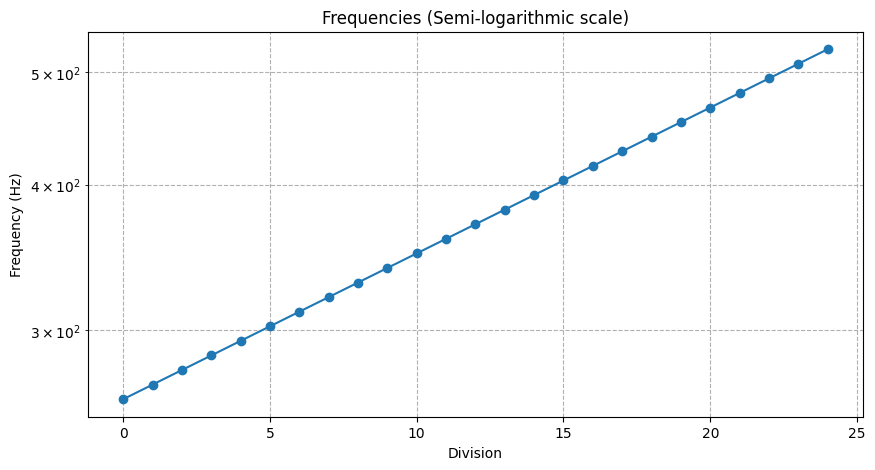

In [11]:
# グラフで表示する
import matplotlib.pyplot as plt

# frequenciesの折れ線グラフの描画
plt.figure(figsize=(10, 5))
plt.plot(frequencies, marker='o')
plt.title('Frequencies')
plt.xlabel('Division')
plt.ylabel('Frequency (Hz)')
plt.grid(True)
plt.show()

# frequenciesの片対数の折れ線グラフの描画
plt.figure(figsize=(10, 5))
plt.semilogy(frequencies, marker='o')
plt.title('Frequencies (Semi-logarithmic scale)')
plt.xlabel('Division')
plt.ylabel('Frequency (Hz)')
plt.grid(True, which="both", ls="--")
plt.show()

## 音の共和と不協和を体験する

In [ ]:
import numpy as np
import soundfile as sf
from IPython.display import Audio

In [15]:
#変数設定
sampling_rate = 44100  #サンプリング周波数を設定
t = np.arange(0, 2, 1 / sampling_rate)  #時間軸を作成（0から2までの２秒分の標本点の時点のリストを作成）

# 波形を２つ作ってみる
A0 = 1  #波形の振幅を設定（0〜１の値）
f0 = 261.6  #周波数の設定
y0 =[0]  #波形の数値を格納する変数を用意
y0 = A0* np.sin(2*np.pi*f0*t)  #波形を作る

A1 = 1  #波形の振幅を設定（0〜１の値）
f1 = 261.6*6/5  #周波数の設定
y1 =[0]  #波形の数値を格納する変数を用意
y1 = A1* np.sin(2*np.pi*f1*t)  #波形を作る

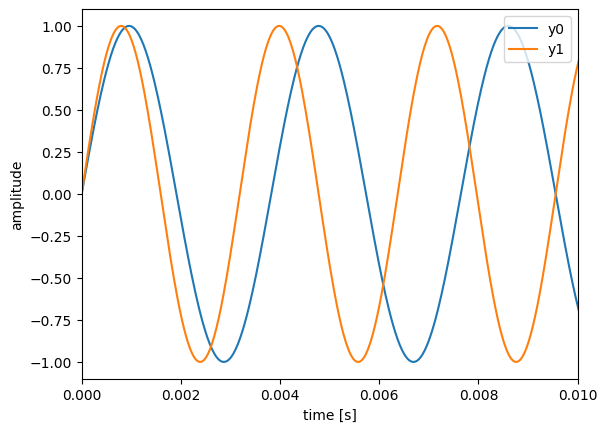

In [16]:
#描画
plt.plot(t, y0, label="y0")  #横軸t,縦軸y
plt.plot(t, y1, label="y1")  #横軸t,縦軸y
plt.xlabel("time [s]")  #x軸のラベル設定
plt.ylabel("amplitude")  #y軸のラベル設定
plt.legend(loc='upper right')  #凡例を右上(upper right）に表示
plt.xlim([0,0.01])  #0から0.01だけの範囲を表示するように設定
plt.show()  #プロット


In [18]:
#音（y0）の出力
Audio(y0, rate = sampling_rate)


In [19]:
#音（y1）の出力
Audio(y1, rate = sampling_rate)


In [20]:
#音（y0とy1を同時に鳴らす）の出力
Audio(y0+y1, rate = sampling_rate)

## スペクトログラムを求める


In [21]:
#ライブラリを準備する
import numpy as np  #数値計算ライブラリ
import matplotlib.pyplot as plt  #描画ライブラリ
from scipy import signal  #信号処理ライブラリ

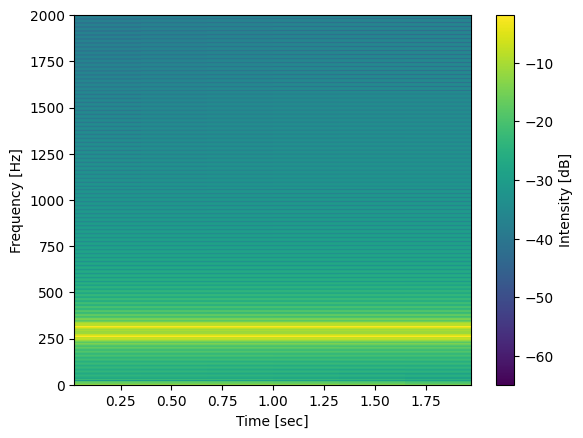

In [23]:
#スペクトログラム分析の実施
f, t, Sxx = signal.spectrogram(y0+y1, sampling_rate, nperseg=16384)

# 描画
plt.pcolormesh(t, f, np.log(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
cbar = plt.colorbar() #カラーバー表示
cbar.ax.set_ylabel("Intensity [dB]") #カラーバーの名称表示
plt.ylim([0,2000])
plt.show()

##実効値を求めよう

In [30]:
#変数設定
sampling_rate = 44100  #サンプリング周波数を設定
t = np.arange(0, 2, 1 / sampling_rate)  #時間軸を作成（0から2までの２秒分の標本点の時点のリストを作成）

# 波形を２つ作ってみる
A0 = 1  #波形の振幅を設定（0〜１の値）
f0 = 261.6  #周波数の設定
y0 =[0]  #波形の数値を格納する変数を用意
y0 = A0* np.sin(2*np.pi*f0*t)  #波形を作る

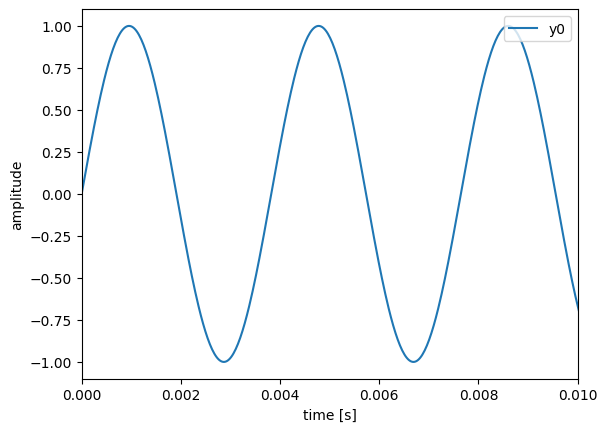

0.7070715612542356


In [31]:
#描画
plt.plot(t, y0, label="y0")  #横軸t,縦軸y
plt.xlabel("time [s]")  #x軸のラベル設定
plt.ylabel("amplitude")  #y軸のラベル設定
plt.legend(loc='upper right')  #凡例を右上(upper right）に表示
plt.xlim([0,0.01])  #0から0.01だけの範囲を表示するように設定
plt.show()  #プロット

# 実効値の計算
rms = np.sqrt(np.square(y0).mean())
print(rms)

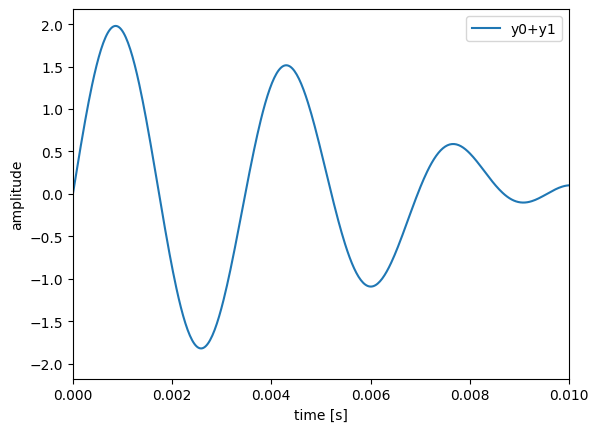

0.9994029547596006

In [32]:
#描画
plt.plot(t, y0+y1, label="y0+y1")  #横軸t,縦軸y
plt.xlabel("time [s]")  #x軸のラベル設定
plt.ylabel("amplitude")  #y軸のラベル設定
plt.legend(loc='upper right')  #凡例を右上(upper right）に表示
plt.xlim([0,0.01])  #0から0.01だけの範囲を表示するように設定
plt.show()  #プロット

np.sqrt(np.square(y0+y1).mean())